### Using Neural Netork to classify the MNIST datasets (digits classification)
    In this notebook we will tune the neural network and look into the results obtained on the classification of the dataset (MNIST)

In [1]:
# Importing the necessary variables
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the MNIST dataset
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

    Visualizing the dataset

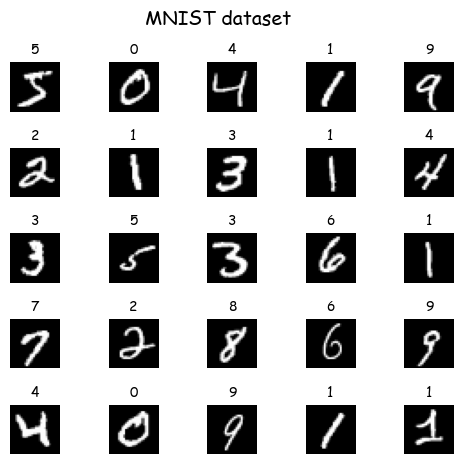

In [5]:
# Visualizing the datasets
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
fig, axes = plt.subplots(5,5, figsize=(5,5))
fig.tight_layout(pad=0.5,rect=[0, 0.03, 1, 0.9]) 
for i,ax in enumerate(axes.flat):
    X_clus_cen = X_train[i]
    ax.imshow(X_clus_cen, cmap='gray')
    ax.set_axis_off()
    ax.set_title(y_train[i],font = "Comic Sans MS")
fig.suptitle("MNIST dataset",fontsize=14,font = "Comic Sans MS")
plt.show()

In [6]:
# reshaping the train matrix such that it could be easily fed into the neural netword we are gonna build
train_dig = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
train_dig.shape , train_dig[:5]

((60000, 784),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [7]:
# A similar process to the test dataset
test_dig = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
test_dig.shape


(10000, 784)

In [8]:
# Converting the datasets to tensor
train_dig = torch.from_numpy(train_dig).type(torch.float32)
train_lab = torch.from_numpy(y_train).type(torch.LongTensor)
test_dig = torch.from_numpy(test_dig).type(torch.float32)
test_lab = torch.from_numpy(y_test).type(torch.LongTensor)

In [9]:
# Now lets build a neural network... since we are going to use pytorch on GPU lets setup device agonistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

    Building a baseline model with 2 hidden layers
    

In [10]:
# Constructing a model
class baseNeuralNetworkV0(nn.Module):
    def __init__(self,):
        super().__init__()
        self.NeuralNetorkSeq = nn.Sequential(
            nn.Linear(in_features=784,out_features=80),
            nn.ReLU(),
            nn.Linear(in_features=80,out_features=60),
            nn.ReLU(),
            nn.Linear(in_features=60,out_features=10))
        
    def forward(self,x):
        return self.NeuralNetorkSeq(x)
    
Model_0 = baseNeuralNetworkV0().to(device)
Model_0       

baseNeuralNetworkV0(
  (NeuralNetorkSeq): Sequential(
    (0): Linear(in_features=784, out_features=80, bias=True)
    (1): ReLU()
    (2): Linear(in_features=80, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=10, bias=True)
  )
)

In [11]:
# Setup loss function
loss_fn0 = nn.CrossEntropyLoss()

# Setup optimizer
optimizer0 = torch.optim.SGD(params=Model_0.parameters(),lr=0.002)

In [49]:
def accuracy_function(y_pred,y_true):
    correct = torch.eq(y_pred,y_true).sum().item()
    accuracy = (correct / len(y_true))*100
    return accuracy

    Running the training loop to train the model

In [13]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=3000
# Changing the datasets to target device
train_nn = train_dig.to(device)
label_nn = train_lab.to(device)
test_nn = test_dig.to(device)
tlabel_nn = test_lab.to(device)
for epoch in range(1,epochs+1):
    # Setting the model in train mode
    Model_0.train()

    # Getting the output and prediction
    y_logits = Model_0(train_nn)
    soft = nn.Softmax(dim=1)
    y_soft = soft(y_logits)
    y_pred = torch.argmax(y_soft,axis=1)

    # Finding the loss 
    loss = loss_fn0(y_logits,label_nn)
    acc = accuracy_function(y_pred=y_pred,y_true=label_nn)

    #optimizer to zerograd
    optimizer0.zero_grad()

    # Backtracking
    loss.backward()

    # Gradient descent
    optimizer0.step()

    #Evaluating step
    Model_0.eval()
    #Evaluvating test loss too
    with torch.inference_mode():
        test_logits = Model_0(test_nn).squeeze()
        test_pred = torch.argmax(soft(test_logits),axis=1)
        acc_test = accuracy_function(test_pred,tlabel_nn)
        loss_test = loss_fn0(test_logits,tlabel_nn)
    if epoch%100==0:
        print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f}")   


Epoch: 100 | Loss: 0.449968 | Acc: 86.553333 | Test loss: 0.447162 | Test acc: 87.020000
Epoch: 200 | Loss: 0.328946 | Acc: 90.213333 | Test loss: 0.343279 | Test acc: 90.250000
Epoch: 300 | Loss: 0.272004 | Acc: 91.930000 | Test loss: 0.294751 | Test acc: 91.620000
Epoch: 400 | Loss: 0.236026 | Acc: 93.050000 | Test loss: 0.264622 | Test acc: 92.480000
Epoch: 500 | Loss: 0.210804 | Acc: 93.780000 | Test loss: 0.243522 | Test acc: 93.050000
Epoch: 600 | Loss: 0.191923 | Acc: 94.371667 | Test loss: 0.228204 | Test acc: 93.550000
Epoch: 700 | Loss: 0.177188 | Acc: 94.820000 | Test loss: 0.216520 | Test acc: 93.910000
Epoch: 800 | Loss: 0.165247 | Acc: 95.195000 | Test loss: 0.207209 | Test acc: 94.160000
Epoch: 900 | Loss: 0.155349 | Acc: 95.483333 | Test loss: 0.199644 | Test acc: 94.390000
Epoch: 1000 | Loss: 0.146949 | Acc: 95.745000 | Test loss: 0.193262 | Test acc: 94.470000
Epoch: 1100 | Loss: 0.139657 | Acc: 95.946667 | Test loss: 0.187670 | Test acc: 94.630000
Epoch: 1200 | Loss:

    From the result seen we acheived a accuracy of 95.92 with the current model... which means to say that we have missclassified 408/10000 test samples.

In [4]:
# Constructing a new model to use for hyper parameters (We will keep the same number of neurons for both layers)

class baseNeuralNetworkV1(nn.Module):
    def __init__(self,layer_neuron):
        super().__init__()
        self.layer_neuron = layer_neuron
        self.NeuralNetorkSeq = nn.Sequential(
            nn.Linear(in_features=784,out_features=self.layer_neuron),
            nn.ReLU(),
            nn.Linear(in_features=self.layer_neuron,out_features=self.layer_neuron),
            nn.ReLU(),
            nn.Linear(in_features=self.layer_neuron,out_features=10))
        
    def forward(self,x):
        return self.NeuralNetorkSeq(x)

    Running the training loop with different neurons in the hidden layer successively and then checking the results

In [16]:
first_layer_input = torch.arange(20,220,20)
#second_layer_input = torch.arange(20,110,20)

epochs=2000
# Changing the datasets to target device
train_nn = train_dig.to(device)
label_nn = train_lab.to(device)
test_nn = test_dig.to(device)
tlabel_nn = test_lab.to(device)

layer_chk1 = np.array([])
layer_chk2 = np.array([])
test_losses = np.array([])
train_losses = np.array([])
test_accuracy = np.array([])
train_accuracy = np.array([])
i=0
for layer1_ in first_layer_input:
    for layer2_ in range(1):
        train_loss = np.array([])
        torch.manual_seed(100)
        Model_new = baseNeuralNetworkV1(layer1_).to(device)
        
        # Setup loss function
        loss_fn1 = nn.CrossEntropyLoss()
        # Setup optimizer
        optimizer1 = torch.optim.Adam(params=Model_new.parameters(),lr=0.0005)

        torch.manual_seed(42)
        torch.cuda.manual_seed(42)
        for epoch in range(1,epochs+1):
            # Setting the model in train mode
            Model_new.train()

            # Getting the output and prediction
            y_logits = Model_new(train_nn)
            soft = nn.Softmax(dim=1)
            y_soft = soft(y_logits)
            y_pred = torch.argmax(y_soft,axis=1)

            # Finding the loss 
            loss = loss_fn1(y_logits,label_nn)
            train_loss = np.append(train_loss,loss.detach().cpu().numpy())
            acc = accuracy_function(y_pred=y_pred,y_true=label_nn)

            #optimizer to zerograd
            optimizer1.zero_grad()

            # Backtracking
            loss.backward()

            # Gradient descent
            optimizer1.step()

            #Evaluating step
            Model_new.eval()
            #Evaluvating test loss too
            #Evaluvating test loss too
            with torch.inference_mode():
                test_logits = Model_new(test_nn).squeeze()
                test_pred = torch.argmax(soft(test_logits),axis=1)
                acc_test = accuracy_function(test_pred,tlabel_nn)
                loss_test = loss_fn1(test_logits,tlabel_nn)
            #print(f"Layer1:{layer1_} | Layer2:{layer1_}")
            if epoch>20 and np.mean(train_loss[epoch-9:epoch+1]-loss.detach().cpu().numpy()) <0.0004:
                print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f} | broken!!!")
                break
        #print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f}")
        layer_chk1 = np.append(layer_chk1,layer1_.cpu().numpy())
        #layer_chk2 = np.append(layer_chk2,layer2_.cpu().numpy())
        test_accuracy = np.append(test_accuracy,acc_test)
        train_accuracy = np.append(train_accuracy,acc)
        test_losses = np.append(test_losses,loss_test.cpu().detach().numpy())
        train_losses = np.append(train_losses,loss.cpu().detach().numpy())
    i+=1
    print(f"Completed {i}/10 part")
        

Epoch: 790 | Loss: 0.173277 | Acc: 94.918333 | Test loss: 0.270336 | Test acc: 92.530000 | broken!!!
Completed 1/15 part
Epoch: 786 | Loss: 0.095671 | Acc: 97.301667 | Test loss: 0.195761 | Test acc: 94.900000 | broken!!!
Completed 2/15 part
Epoch: 688 | Loss: 0.039613 | Acc: 98.983333 | Test loss: 0.153193 | Test acc: 95.860000 | broken!!!
Completed 3/15 part
Epoch: 547 | Loss: 0.026386 | Acc: 99.491667 | Test loss: 0.148521 | Test acc: 96.170000 | broken!!!
Completed 4/15 part
Epoch: 565 | Loss: 0.026629 | Acc: 99.430000 | Test loss: 0.149533 | Test acc: 96.160000 | broken!!!
Completed 5/15 part
Epoch: 477 | Loss: 0.019695 | Acc: 99.675000 | Test loss: 0.140802 | Test acc: 96.440000 | broken!!!
Completed 6/15 part
Epoch: 392 | Loss: 0.015385 | Acc: 99.783333 | Test loss: 0.127609 | Test acc: 96.590000 | broken!!!
Completed 7/15 part
Epoch: 424 | Loss: 0.016153 | Acc: 99.760000 | Test loss: 0.127290 | Test acc: 96.680000 | broken!!!
Completed 8/15 part
Epoch: 441 | Loss: 0.018232 | Ac

In [19]:
import pandas as pd
Hyper_tuning = pd.DataFrame({'Layer1':layer_chk1,'Layer2':layer_chk1,'Train loss':train_losses,'Test losses':test_losses,'Train Acc':train_accuracy,'Test Acc':test_accuracy})
Hyper_tuning.to_csv('Hyper tuning mat for MNIST_new_20_200_Adam.csv')

In [20]:
Hyper_tuning

,Layer1,Layer2,Train loss,Test losses,Train Acc,Test Acc
0,20.0,20.0,0.173277,0.270336,94.918333,92.53
1,40.0,40.0,0.095671,0.195761,97.301667,94.90
2,60.0,60.0,0.039613,0.153193,98.983333,95.86
3,80.0,80.0,0.026386,0.148521,99.491667,96.17
4,100.0,100.0,0.026629,0.149533,99.430000,96.16
5,120.0,120.0,0.019695,0.140802,99.675000,96.44
6,140.0,140.0,0.015385,0.127609,99.783333,96.59
7,160.0,160.0,0.016153,0.127290,99.760000,96.68
8,180.0,180.0,0.018232,0.138647,99.710000,96.43
9,200.0,200.0,0.012932,0.125786,99.853333,96.59


    From this we look that 120-120 is looking good for our model based on the test accuracy and also comparatively lesser no of epochs needed to run the model. We could also set this to 128-128 as it will be more efficient for computing... lets look at a more efficient one neurons between 120-130

In [21]:
first_layer_input = torch.arange(120,131)
#second_layer_input = torch.arange(20,110,20)

epochs=2000
# Changing the datasets to target device
train_nn = train_dig.to(device)
label_nn = train_lab.to(device)
test_nn = test_dig.to(device)
tlabel_nn = test_lab.to(device)

layer_chk1 = np.array([])
layer_chk2 = np.array([])
test_losses = np.array([])
train_losses = np.array([])
test_accuracy = np.array([])
train_accuracy = np.array([])
i=0
for layer1_ in first_layer_input:
    for layer2_ in range(1):
        train_loss = np.array([])
        torch.manual_seed(100)
        Model_new = baseNeuralNetworkV1(layer1_).to(device)
        
        # Setup loss function
        loss_fn1 = nn.CrossEntropyLoss()
        # Setup optimizer
        optimizer1 = torch.optim.Adam(params=Model_new.parameters(),lr=0.0005)

        torch.manual_seed(42)
        torch.cuda.manual_seed(42)
        for epoch in range(1,epochs+1):
            # Setting the model in train mode
            Model_new.train()

            # Getting the output and prediction
            y_logits = Model_new(train_nn)
            soft = nn.Softmax(dim=1)
            y_soft = soft(y_logits)
            y_pred = torch.argmax(y_soft,axis=1)

            # Finding the loss 
            loss = loss_fn1(y_logits,label_nn)
            train_loss = np.append(train_loss,loss.detach().cpu().numpy())
            acc = accuracy_function(y_pred=y_pred,y_true=label_nn)

            #optimizer to zerograd
            optimizer1.zero_grad()

            # Backtracking
            loss.backward()

            # Gradient descent
            optimizer1.step()

            #Evaluating step
            Model_new.eval()
            #Evaluvating test loss too
            #Evaluvating test loss too
            with torch.inference_mode():
                test_logits = Model_new(test_nn).squeeze()
                test_pred = torch.argmax(soft(test_logits),axis=1)
                acc_test = accuracy_function(test_pred,tlabel_nn)
                loss_test = loss_fn1(test_logits,tlabel_nn)
            #print(f"Layer1:{layer1_} | Layer2:{layer1_}")
            if epoch>20 and np.mean(train_loss[epoch-9:epoch+1]-loss.detach().cpu().numpy()) <0.0004:
                print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f} | broken!!!")
                break
        #print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f}")
        layer_chk1 = np.append(layer_chk1,layer1_.cpu().numpy())
        #layer_chk2 = np.append(layer_chk2,layer2_.cpu().numpy())
        test_accuracy = np.append(test_accuracy,acc_test)
        train_accuracy = np.append(train_accuracy,acc)
        test_losses = np.append(test_losses,loss_test.cpu().detach().numpy())
        train_losses = np.append(train_losses,loss.cpu().detach().numpy())
    i+=1
    print(f"Completed {i}/11 part")

Epoch: 477 | Loss: 0.019695 | Acc: 99.675000 | Test loss: 0.140802 | Test acc: 96.440000 | broken!!!
Completed 1/10 part
Epoch: 461 | Loss: 0.018154 | Acc: 99.706667 | Test loss: 0.123819 | Test acc: 96.820000 | broken!!!
Completed 2/10 part
Epoch: 471 | Loss: 0.019989 | Acc: 99.665000 | Test loss: 0.124633 | Test acc: 96.490000 | broken!!!
Completed 3/10 part
Epoch: 435 | Loss: 0.018102 | Acc: 99.700000 | Test loss: 0.141316 | Test acc: 96.360000 | broken!!!
Completed 4/10 part
Epoch: 452 | Loss: 0.018679 | Acc: 99.690000 | Test loss: 0.123308 | Test acc: 96.750000 | broken!!!
Completed 5/10 part
Epoch: 415 | Loss: 0.016906 | Acc: 99.753333 | Test loss: 0.155875 | Test acc: 96.280000 | broken!!!
Completed 6/10 part
Epoch: 488 | Loss: 0.019756 | Acc: 99.631667 | Test loss: 0.129362 | Test acc: 96.470000 | broken!!!
Completed 7/10 part
Epoch: 478 | Loss: 0.020421 | Acc: 99.651667 | Test loss: 0.131660 | Test acc: 96.590000 | broken!!!
Completed 8/10 part
Epoch: 416 | Loss: 0.015521 | Ac

    we could see that Epoch corresponding to 8th part which is 128-128 neurons take comparatively lesser epochs compared to other values so lets fix 128-128 neurons in the middle layer.

In [22]:
Hyper_tuning2 = pd.DataFrame({'Layer1':layer_chk1,'Layer2':layer_chk1,'Train loss':train_losses,'Test losses':test_losses,'Train Acc':train_accuracy,'Test Acc':test_accuracy})
Hyper_tuning2.to_csv('Hyper tuning mat for MNIST_new_120_130_Adam.csv')
Hyper_tuning2

,Layer1,Layer2,Train loss,Test losses,Train Acc,Test Acc
0,120.0,120.0,0.019695,0.140802,99.675000,96.44
1,121.0,121.0,0.018154,0.123819,99.706667,96.82
2,122.0,122.0,0.019989,0.124633,99.665000,96.49
3,123.0,123.0,0.018102,0.141316,99.700000,96.36
4,124.0,124.0,0.018679,0.123308,99.690000,96.75
5,125.0,125.0,0.016906,0.155875,99.753333,96.28
6,126.0,126.0,0.019756,0.129362,99.631667,96.47
7,127.0,127.0,0.020421,0.131660,99.651667,96.59
8,128.0,128.0,0.015521,0.122343,99.790000,96.58
9,129.0,129.0,0.020953,0.136154,99.621667,96.37


In [25]:
# Newer model with tuned nuerons per layer
# Constructing a new model
class baseNeuralNetworkNtuned(nn.Module):
    def __init__(self):
        super().__init__()
        self.NeuralNetorkSeq = nn.Sequential(
            nn.Linear(in_features=784,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=10))
        
    def forward(self,x):
        return self.NeuralNetorkSeq(x)

    Now since we have neurons and number of hidden layer fixed, and also the optimizer is chosen as Adam optimizer lets tune the learning rate...

In [43]:
epochs=2000
# Changing the datasets to target device
train_nn = train_dig.to(device)
label_nn = train_lab.to(device)
test_nn = test_dig.to(device)
tlabel_nn = test_lab.to(device)

learn_rate_ten = np.array([])
test_losses = np.array([])
train_losses = np.array([])
test_accuracy = np.array([])
train_accuracy = np.array([])
i=0
for learn_rate in torch.Tensor([0.0001,0.00025,0.0005,0.00075,0.001,0.002,0.005,0.0075,0.01,0.02,0.05]):
    train_loss_chk = np.array([])
    torch.manual_seed(100)
    Model_new = baseNeuralNetworkNtuned().to(device)

    # Setup loss function
    loss_fn2 = nn.CrossEntropyLoss()
    # Setup optimizer
    optimizer2 = torch.optim.Adam(params=Model_new.parameters(),lr=learn_rate)

    torch.manual_seed(42)
    torch.cuda.manual_seed(42)
    for epoch in range(1,epochs+1):
        # Setting the model in train mode
        Model_new.train()

        # Getting the output and prediction
        y_logits = Model_new(train_nn)
        soft = nn.Softmax(dim=1)
        y_soft = soft(y_logits)
        y_pred = torch.argmax(y_soft,axis=1)

        # Finding the loss 
        loss = loss_fn2(y_logits,label_nn)
        train_loss_chk = np.append(train_loss_chk,loss.detach().cpu().numpy())
        acc = accuracy_function(y_pred=y_pred,y_true=label_nn)

        #optimizer to zerograd
        optimizer2.zero_grad()

        # Backtracking
        loss.backward()

        # Gradient descent
        optimizer2.step()

        #Evaluating step
        Model_new.eval()
        #Evaluvating test loss too
        #Evaluvating test loss too
        with torch.inference_mode():
            test_logits = Model_new(test_nn).squeeze()
            test_pred = torch.argmax(soft(test_logits),axis=1)
            acc_test = accuracy_function(test_pred,tlabel_nn)
            loss_test = loss_fn2(test_logits,tlabel_nn)
            #print(f"Layer1:{layer1_} | Layer2:{layer1_}")
        #print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f} ")
        if epoch>20 and np.mean(train_loss_chk[epoch-9:epoch+1]-loss.detach().cpu().numpy()) <0.0004:
            print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f} | broken!!!")
            break

        if epoch>5 and train_loss_chk[epoch-2] - train_loss_chk[epoch-1] < -0.05:
            print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f} | overshooting!!!")
            break
        #print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f}")
    learn_rate_ten = np.append(learn_rate_ten,learn_rate.cpu().numpy())
    #layer_chk2 = np.append(layer_chk2,layer2_.cpu().numpy())
    test_accuracy = np.append(test_accuracy,acc_test)
    train_accuracy = np.append(train_accuracy,acc)
    test_losses = np.append(test_losses,loss_test.cpu().detach().numpy())
    train_losses = np.append(train_losses,loss.cpu().detach().numpy())
    i+=1
    print(f"Completed {i}/11 part")

Epoch: 797 | Loss: 0.040822 | Acc: 99.013333 | Test loss: 0.145825 | Test acc: 95.870000 | broken!!!
Completed 1/11 part
Epoch: 533 | Loss: 0.023475 | Acc: 99.560000 | Test loss: 0.135434 | Test acc: 96.280000 | broken!!!
Completed 2/11 part
Epoch: 416 | Loss: 0.015526 | Acc: 99.793333 | Test loss: 0.122517 | Test acc: 96.560000 | broken!!!
Completed 3/11 part
Epoch: 385 | Loss: 0.014980 | Acc: 99.801667 | Test loss: 0.130387 | Test acc: 96.640000 | broken!!!
Completed 4/11 part
Epoch: 380 | Loss: 0.013871 | Acc: 99.795000 | Test loss: 0.137126 | Test acc: 96.550000 | broken!!!
Completed 5/11 part
Epoch: 425 | Loss: 0.014261 | Acc: 99.760000 | Test loss: 0.158097 | Test acc: 96.620000 | broken!!!
Completed 6/11 part
Epoch: 317 | Loss: 0.064230 | Acc: 98.098333 | Test loss: 0.182933 | Test acc: 95.380000 | broken!!!
Completed 7/11 part
Epoch: 9 | Loss: 3.608708 | Acc: 46.448333 | Test loss: 2.856245 | Test acc: 52.970000 | overshooting!!!
Completed 8/11 part
Epoch: 248 | Loss: 0.154573 

In [45]:
Hyper_tuning3 = pd.DataFrame({'Learn rate':learn_rate_ten,'Train loss':train_losses,'Test losses':test_losses,'Train Acc':train_accuracy,'Test Acc':test_accuracy})
Hyper_tuning3.to_csv('Hyper tuning mat for MNIST_learnrate_Adam.csv')
Hyper_tuning3

,Learn rate,Train loss,Test losses,Train Acc,Test Acc
0,0.00010,0.040822,0.145825,99.013333,95.87
1,0.00025,0.023475,0.135434,99.560000,96.28
2,0.00050,0.015526,0.122517,99.793333,96.56
3,0.00075,0.014980,0.130387,99.801667,96.64
4,0.00100,0.013871,0.137126,99.795000,96.55
5,0.00200,0.014261,0.158097,99.760000,96.62
6,0.00500,0.064230,0.182933,98.098333,95.38
7,0.00750,3.608708,2.856245,46.448333,52.97
8,0.01000,0.154573,0.227013,95.303333,93.85
9,0.02000,2.115927,2.155414,19.435000,15.48


    Looks like 0.0005 as the learning rate has good accuracy and less loss compared to others and also lesser number of epochs...

Thus we have tuned our model now lets train out final model and look into the results

In [114]:
# Constructing a new model
class NeuralNetworkFinaltuned(nn.Module):
    def __init__(self):
        super().__init__()
        self.NeuralNetorkSeq = nn.Sequential(
            nn.Linear(in_features=784,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=10))
        
    def forward(self,x):
        return self.NeuralNetorkSeq(x)

torch.manual_seed(100)  
Model_final = NeuralNetworkFinaltuned().to(device)
Model_final

NeuralNetworkFinaltuned(
  (NeuralNetorkSeq): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [115]:
# Setup loss function
loss_fn_final = nn.CrossEntropyLoss()

# Setup optimizer
optimizer_final = torch.optim.Adam(params=Model_final.parameters(),lr=0.0005)

In [116]:
# Final training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=2000
# Changing the datasets to target device
train_nn = train_dig.to(device)
label_nn = train_lab.to(device)
test_nn = test_dig.to(device)
tlabel_nn = test_lab.to(device)
train_loss_chk = np.array([])
for epoch in range(1,epochs+1):
    # Setting the model in train mode
    Model_final.train()

    # Getting the output and prediction
    y_logits = Model_final(train_nn)
    soft = nn.Softmax(dim=1)
    y_soft = soft(y_logits)
    y_pred = torch.argmax(y_soft,axis=1)

    # Finding the loss 
    loss = loss_fn_final(y_logits,label_nn)
    train_loss_chk = np.append(train_loss_chk,loss.detach().cpu().numpy())
    acc = accuracy_function(y_pred=y_pred,y_true=label_nn)

    #optimizer to zerograd
    optimizer_final.zero_grad()

    # Backtracking
    loss.backward()

    # Gradient descent
    optimizer_final.step()

    #Evaluating step
    Model_final.eval()
    #Evaluvating test loss too
    with torch.inference_mode():
        test_logits = Model_final(test_nn).squeeze()
        test_pred = torch.argmax(soft(test_logits),axis=1)
        acc_test = accuracy_function(test_pred,tlabel_nn)
        loss_test = loss_fn_final(test_logits,tlabel_nn)
    if epoch>20 and np.mean(train_loss_chk[epoch-9:epoch+1]-loss.detach().cpu().numpy()) <0.0003:
            print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f} | broken!!!")
            break
    if epoch%50==0:
        print(f"Epoch: {epoch} | Loss: {loss:3f} | Acc: {acc:2f} | Test loss: {loss_test:3f} | Test acc: {acc_test:2f}") 

Epoch: 50 | Loss: 0.266480 | Acc: 92.476667 | Test loss: 0.284571 | Test acc: 92.070000
Epoch: 100 | Loss: 0.150159 | Acc: 95.631667 | Test loss: 0.195026 | Test acc: 94.210000
Epoch: 150 | Loss: 0.097555 | Acc: 97.176667 | Test loss: 0.160790 | Test acc: 95.080000
Epoch: 200 | Loss: 0.067073 | Acc: 98.106667 | Test loss: 0.142488 | Test acc: 95.600000
Epoch: 250 | Loss: 0.047334 | Acc: 98.743333 | Test loss: 0.131959 | Test acc: 95.980000
Epoch: 300 | Loss: 0.033466 | Acc: 99.245000 | Test loss: 0.125761 | Test acc: 96.340000
Epoch: 350 | Loss: 0.023816 | Acc: 99.555000 | Test loss: 0.122317 | Test acc: 96.420000
Epoch: 400 | Loss: 0.017176 | Acc: 99.738333 | Test loss: 0.122102 | Test acc: 96.530000
Epoch: 450 | Loss: 0.012627 | Acc: 99.855000 | Test loss: 0.123625 | Test acc: 96.660000
Epoch: 453 | Loss: 0.012406 | Acc: 99.856667 | Test loss: 0.123785 | Test acc: 96.650000 | broken!!!


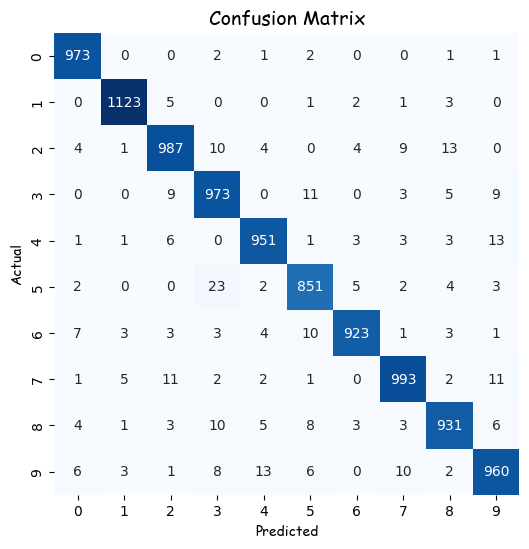

In [117]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test,y_pred=test_pred.detach().cpu().numpy())
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, 
            cbar=False,fmt='1d', cmap='Blues', ax=ax)
bigfont = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }
ax.set_title('Confusion Matrix',bigfont)
ax.set_xlabel('Predicted',font)
ax.set_ylabel('Actual',font)
plt.show()

From this we could see that the confused elements are 3-5 , 4-9 , with an accuracy of 96.55% a bigger neural network can achieve better accuracy. Lets plot some of the predictions...

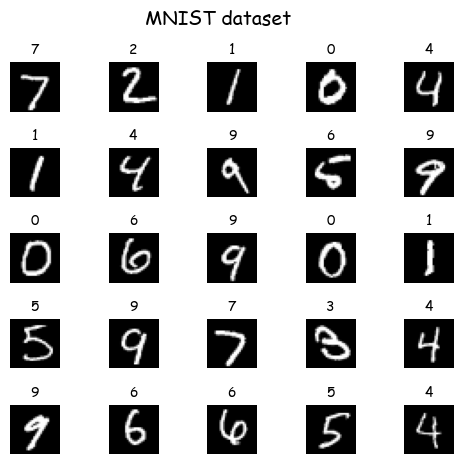

In [120]:
# Visualizing the datasets
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
fig, axes = plt.subplots(5,5, figsize=(5,5))
fig.tight_layout(pad=0.5,rect=[0, 0.03, 1, 0.9]) 
for i,ax in enumerate(axes.flat):
    X_clus_cen = X_test[i]
    ax.imshow(X_clus_cen, cmap='gray')
    ax.set_axis_off()
    ax.set_title(test_pred[i].detach().cpu().numpy(),font = "Comic Sans MS")
fig.suptitle("MNIST dataset",fontsize=14,font = "Comic Sans MS")
plt.show()

    From this set we could see thta here 9th image 5 and 6 looks confusing hence mispredicted by the model... Thats it for this notebook --THE END--